In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
import matplotlib.pyplot as plt
import io
!pip install choicemodels --
import seaborn as sns
import statistics
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Simplified Copy of Mobility Project Survey (Responses).xlsx to Simplified Copy of Mobility Project Survey (Responses).xlsx


In [ ]:
df = pd.read_excel(io.BytesIO(uploaded['Simplified Copy of Mobility Project Survey (Responses).xlsx']))
df.info

df.head()

df.columns

allresponses = {}
for i in df.iloc[:, 1:]:
  allresponses[i] = []
  for j in df[i]:
    if j not in allresponses[i]:
      allresponses[i].append(j)


for (key, value) in allresponses.items():
  print(key,value)

Age Group ['18-22', '23-28', '28-35', '> 40']
Gender ['Female', 'Male', 'Nonbinary']
Average Family Income ['$61k-$80k', '$41k-$60k', '> $100k', '< $28k', '$81k-$100k', '$28k-$40k']
Residence ['Live with Parents at home', 'Dorming', 'Live on my own']
Preferred Mode of Transportation ['MTA Transit/Subway', 'Bike', 'Walking', 'Taxi/ Uber/ Lyft', 'NYU Bus Shuttle System', 'Personal Vehicle']
Travel Time [40, 12, 20, 60, 25, 50, 90, 15, 7, 30, 45, 10, 80, 5, 120, 150, 16, 35, 75]
Cost [5.5, 0.0, 13.0, 20.0, 5.0, 3.25, 40.0, 3.0, 6.0, 4.0, 4.5, 1.0, 25.0, 5.25, 15.0]
Origin ['Tandon ', 'Lafayette', 'Union Square', 'Park Slope', 'Bayridge', 'Washington Square', 'Bronx ', 'Fort Green', 'Queens', 'Clark ', 'Stamford CT', 'Grand Central ', 'Gramercy Green', 'Delancey ', 'Founders', 'Spring Street ', 'Stuyvesant Town', 'Astor Place', 'Broome', 'Penn Station ', 'Gould Plaza', 'Coral Tower', 'Ridgewood ', 'Third Ave', 'Greenwich Village', 'East Village', 'East Elmhurst', 'Hunts Point', 'Brownsvill

In [ ]:
#Counting all the unique responses
for i in allresponses.keys():
  print("ALL the counted responses this key:", i)
  print(df.value_counts(i))
  print('-'*50)

ALL the counted responses this key: Age Group
Age Group
18-22    103
23-28     10
> 40       7
28-35      4
dtype: int64
--------------------------------------------------
ALL the counted responses this key: Gender
Gender
Male         65
Female       56
Nonbinary     3
dtype: int64
--------------------------------------------------
ALL the counted responses this key: Average Family Income
Average Family Income
> $100k       42
$28k-$40k     19
$61k-$80k     17
< $28k        16
$41k-$60k     16
$81k-$100k    14
dtype: int64
--------------------------------------------------
ALL the counted responses this key: Residence
Residence
Dorming                      47
Live on my own               39
Live with Parents at home    38
dtype: int64
--------------------------------------------------
ALL the counted responses this key: Preferred Mode of Transportation
Preferred Mode of Transportation
MTA Transit/Subway        69
Walking                   25
NYU Bus Shuttle System    21
Taxi/ Uber/ Lyf

In [ ]:
#Percent responses
for i in allresponses.keys():
  print("Percent of responses:")
  print(df[i].value_counts(normalize=True))
  print('-'*50)

Percent of responses:
18-22    0.830645
23-28    0.080645
> 40     0.056452
28-35    0.032258
Name: Age Group, dtype: float64
--------------------------------------------------
Percent of responses:
Male         0.524194
Female       0.451613
Nonbinary    0.024194
Name: Gender, dtype: float64
--------------------------------------------------
Percent of responses:
> $100k       0.338710
$28k-$40k     0.153226
$61k-$80k     0.137097
< $28k        0.129032
$41k-$60k     0.129032
$81k-$100k    0.112903
Name: Average Family Income, dtype: float64
--------------------------------------------------
Percent of responses:
Dorming                      0.379032
Live on my own               0.314516
Live with Parents at home    0.306452
Name: Residence, dtype: float64
--------------------------------------------------
Percent of responses:
MTA Transit/Subway        0.556452
Walking                   0.201613
NYU Bus Shuttle System    0.169355
Taxi/ Uber/ Lyft          0.024194
Bike               

In [ ]:
#Let's figure out where to put this 
# a use of input()
factor1= input("Question 1: ")
answer1= input("Answer 1: ")
factor2=input("Question 2: ")
answer2=input("Answer 2: ")

Question 1: Origin
Answer 1: Lafayette
Question 2: Destination
Answer 2: Tandon


In [ ]:
#Percent responses for only one value based on their inputs
said_ans1=df[factor1] == answer1
Percent1=said_ans1.value_counts(normalize=True)
print("Percent of responses:")
print(Percent1)
said_ans2=df[factor2] == answer2
Percent2=said_ans2.value_counts(normalize=True)
print("Percent of responses:")
print(Percent2)

Percent of responses:
False    0.862903
True     0.137097
Name: Origin, dtype: float64
Percent of responses:
True     0.516129
False    0.483871
Name: Destination, dtype: float64


In [ ]:
#def TransportationProf():
combinedProb=Percent1.get(True)*Percent2.get(True)
TransportationProb=df['Preferred Mode of Transportation'].value_counts(normalize=True)
TheirProb= combinedProb*TransportationProb*100
print('Probability they will use: ')
print(TheirProb)

Probability they will use: 
MTA Transit/Subway        3.937431
Walking                   1.426605
NYU Bus Shuttle System    1.198348
Taxi/ Uber/ Lyft          0.171193
Bike                      0.171193
Personal Vehicle          0.171193
Name: Preferred Mode of Transportation, dtype: float64 %


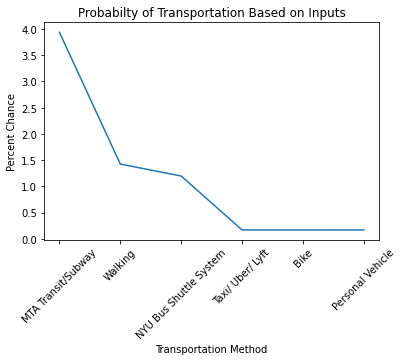

In [29]:
plt.ylabel('Percent Chance')
plt.xlabel('Transportation Method')
plt.xticks(rotation=45)
plt.title('Probabilty of Transportation Based on Inputs')
plt.plot(TheirProb)

KeyError: ignored